In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
data = pd.read_csv(#your data file path)

data = data.iloc[:, :-1] 

centered_data = data - data.mean()


In [5]:
#1. Compute the multivariate mean vector
mean_vector = data.mean()
print("Multivariate Mean Vector:\n", mean_vector)

Multivariate Mean Vector:
 fLength      57.675030
fWidth       24.015214
fSize         2.873639
fConc         0.363390
fConc1        0.207434
fAsym        -3.221765
fM3Long      13.136590
fM3Trans      1.791702
fAlpha       31.526518
fDist       197.804527
dtype: float64


In [6]:
#2. Compute the sample covariance matrix as inner products between the columns of the centered data matrix.
cov_matrix_inner = np.dot(centered_data.T, centered_data) / (len(data) - 1)
print("\nSample Covariance Matrix (Inner product):\n", cov_matrix_inner)


Sample Covariance Matrix (Inner product):
 [[ 1.76671060e+03  7.31278208e+02  1.38777613e+01 -4.79597589e+00
  -2.75430985e+00 -3.38521963e+02 -3.17091670e+02  1.34197204e+02
  -4.26995152e+01  1.08850674e+03]
 [ 7.31278208e+02  5.11310810e+02  7.03148837e+00 -2.23083506e+00
  -1.29248588e+00  2.54802711e+02 -4.19194118e+02  7.64208425e+01
   3.46720258e+01  4.56444068e+02]
 [ 1.38777613e+01  7.03148837e+00  2.26271192e-01 -6.74936308e-02
  -3.87883133e-02  4.60739147e-01  1.60894156e+00  6.48693246e-01
  -2.84638820e+00  1.74006840e+01]
 [-4.79597589e+00 -2.23083506e+00 -6.74936308e-02  2.94825044e-02
   1.78747973e-02  3.29189889e-01 -8.84361090e-01 -3.93915412e-01
   1.31979942e+00 -4.61574466e+00]
 [-2.75430985e+00 -1.29248588e+00 -3.87883133e-02  1.78747973e-02
   1.14612948e-02  1.54446386e-01 -6.05826971e-01 -2.09961420e-01
   7.10752532e-01 -2.52378666e+00]
 [-3.38521963e+02  2.54802711e+02  4.60739147e-01  3.29189889e-01
   1.54446386e-01  3.89983867e+03 -2.63597250e+02  1.54

In [7]:
#3. Compute the sample covariance matrix as outer product between the centered data points.
cov_matrix_outer = np.cov(centered_data.T)
print("\nSample Covariance Matrix (Outer product):\n", cov_matrix_outer)


Sample Covariance Matrix (Outer product):
 [[ 1.76671060e+03  7.31278208e+02  1.38777613e+01 -4.79597589e+00
  -2.75430985e+00 -3.38521963e+02 -3.17091670e+02  1.34197204e+02
  -4.26995152e+01  1.08850674e+03]
 [ 7.31278208e+02  5.11310810e+02  7.03148837e+00 -2.23083506e+00
  -1.29248588e+00  2.54802711e+02 -4.19194118e+02  7.64208425e+01
   3.46720258e+01  4.56444068e+02]
 [ 1.38777613e+01  7.03148837e+00  2.26271192e-01 -6.74936308e-02
  -3.87883133e-02  4.60739147e-01  1.60894156e+00  6.48693246e-01
  -2.84638820e+00  1.74006840e+01]
 [-4.79597589e+00 -2.23083506e+00 -6.74936308e-02  2.94825044e-02
   1.78747973e-02  3.29189889e-01 -8.84361090e-01 -3.93915412e-01
   1.31979942e+00 -4.61574466e+00]
 [-2.75430985e+00 -1.29248588e+00 -3.87883133e-02  1.78747973e-02
   1.14612948e-02  1.54446386e-01 -6.05826971e-01 -2.09961420e-01
   7.10752532e-01 -2.52378666e+00]
 [-3.38521963e+02  2.54802711e+02  4.60739147e-01  3.29189889e-01
   1.54446386e-01  3.89983867e+03 -2.63597250e+02  1.54


Correlation (cosine similarity) between Attribute 1 and 2: 0.7694093096665072


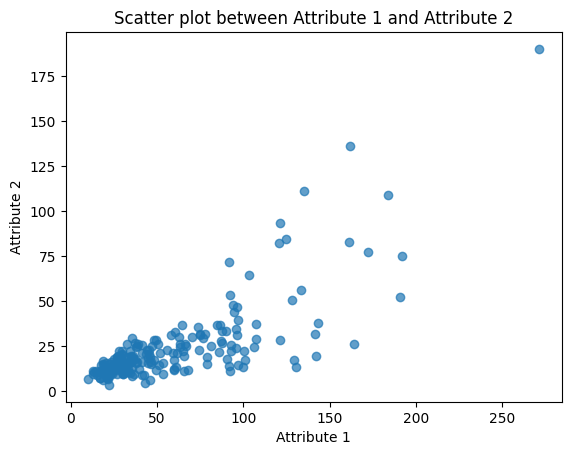

In [8]:
#4. Compute the correlation between Attributes 1 and 2 by computing the cosine of the angle between the centered attribute vectors. Plot the scatter plot between these two attributes.
attribute_1 = centered_data.iloc[:, 0]
attribute_2 = centered_data.iloc[:, 1]

cosine_similarity = np.dot(attribute_1, attribute_2) / (np.linalg.norm(attribute_1) * np.linalg.norm(attribute_2))
print("\nCorrelation (cosine similarity) between Attribute 1 and 2:", cosine_similarity)

plt.scatter(data.iloc[:, 0], data.iloc[:, 1], alpha=0.7)
plt.title('Scatter plot between Attribute 1 and Attribute 2')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.show()

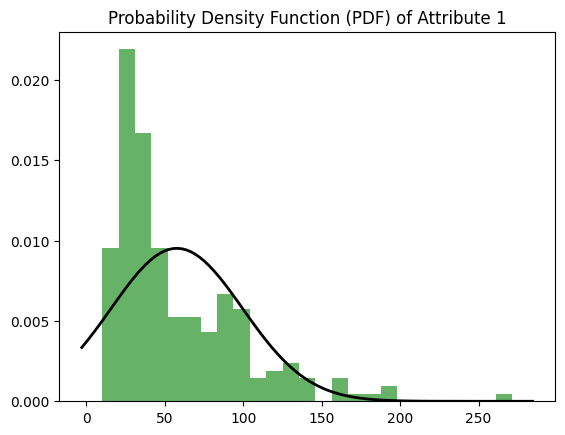

In [9]:
#5. Assuming that Attribute 1 is normally distributed, plot its probability density function.
attribute_1 = data.iloc[:, 0]
mu, std = norm.fit(attribute_1)

plt.hist(attribute_1, bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Probability Density Function (PDF) of Attribute 1')
plt.show()

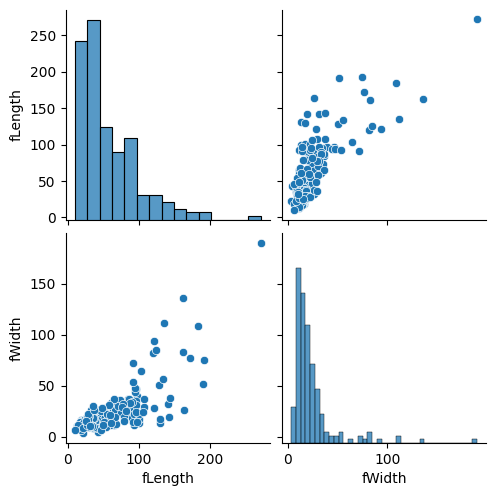

In [10]:
#6. Plot pairplot between any two different attributes.
sns.pairplot(data.iloc[:, [0, 1]])
plt.show()

In [11]:
#7. Which attribute has the largest variance, and which attribute has the smallest variance? Print these values.
variances = data.var()
largest_variance = variances.max()
smallest_variance = variances.min()
largest_attribute = variances.idxmax()
smallest_attribute = variances.idxmin()

print("\nAttribute with largest variance:", largest_attribute, "with value:", largest_variance)
print("Attribute with smallest variance:", smallest_attribute, "with value:", smallest_variance)


Attribute with largest variance: fDist with value: 6361.467590825798
Attribute with smallest variance: fConc1 with value: 0.011461294765671641


In [12]:
#8. Which pair of attributes has the largest covariance, and which pair of attributes has the smallest covariance? Print these values.
cov_matrix = data.cov()
largest_cov = cov_matrix.values[np.triu_indices_from(cov_matrix, 1)].max()
smallest_cov = cov_matrix.values[np.triu_indices_from(cov_matrix, 1)].min()

idx_largest_cov = np.where(cov_matrix == largest_cov)
idx_smallest_cov = np.where(cov_matrix == smallest_cov)

print("\nPair of attributes with largest covariance:", cov_matrix.index[idx_largest_cov[0][0]], "and", cov_matrix.columns[idx_largest_cov[1][0]], "with value:", largest_cov)
print("Pair of attributes with smallest covariance:", cov_matrix.index[idx_smallest_cov[0][0]], "and", cov_matrix.columns[idx_smallest_cov[1][0]], "with value:", smallest_cov)


Pair of attributes with largest covariance: fLength and fDist with value: 1088.5067354049152
Pair of attributes with smallest covariance: fAsym and fDist with value: -659.9735489916213


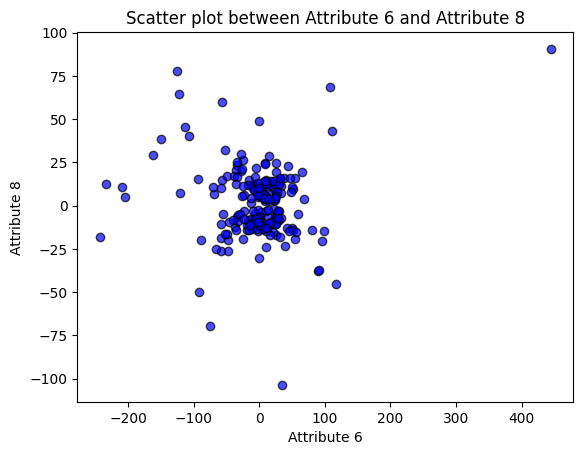

In [13]:
#9. Plot attribute 6 vs attribute 8. Mark each point as a circle.
plt.scatter(data.iloc[:, 5], data.iloc[:, 7], c='blue', alpha=0.7, edgecolor='k')
plt.title('Scatter plot between Attribute 6 and Attribute 8')
plt.xlabel('Attribute 6')
plt.ylabel('Attribute 8')
plt.show()